In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

from model import Schelling

In [2]:
model = Schelling(100, 100, 0.97, 0.0, [0.6, 0.1, 0.1, 0.2], 3, 10)
print(model.total_avg_cluster_size)

0.0


In [3]:
while model.running and model.schedule.steps < 100:
    model.step()
print(model.schedule.steps)

C:\Users\mirja\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mirja\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


100


In [4]:
def WealthOnGrid(model):
    wealth_on_grid = np.zeros((model.grid.width, model.grid.height))

    for cell in model.grid.coord_iter():
        cell_content, x, y = cell
        if cell_content:
            wealth_on_grid[x][y] = cell_content.wealth

    plt.imshow(wealth_on_grid, interpolation="nearest")
    plt.colorbar()
    plt.show()
    
    return wealth_on_grid

In [9]:
def WealthSegregation(model, wealth_on_grid):
    x = random.randint(0, model.grid.width-1)
    y = random.randint(0, model.grid.width-1)

    N = model.grid.width
    var_list = []
    L_list = []

    for L in range(1, N):
        # Determine the coordinates of the square based on the initial coordinate and L
        start_row = x - (L // 2)
        end_row = start_row + L
        start_col = y - (L // 2)
        end_col = start_col + L

        # Adjust the coordinates if they exceed the array boundaries
        if end_row > N:
            start_row -= end_row - N
            end_row = N
        if end_col > N:
            start_col -= end_col - N
            end_col = N
        if start_row < 0:
            end_row -= start_row
            start_row = 0
        if start_col < 0:
            end_col -= start_col
            start_col = 0

        # Calculate the wealth variance in the square
        var = np.var(wealth_on_grid[start_row:end_row, start_col:end_col])

        # Append variance to list
        var_list.append(var)
        L_list.append(L)

    plt.plot(L_list, var_list)
    plt.xlabel("L")
    plt.ylabel("variance")
    plt.show()
    
#     return var_list

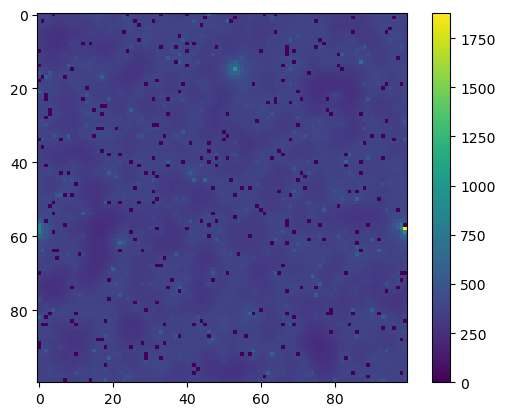

In [10]:
wealth_on_grid = WealthOnGrid(model)

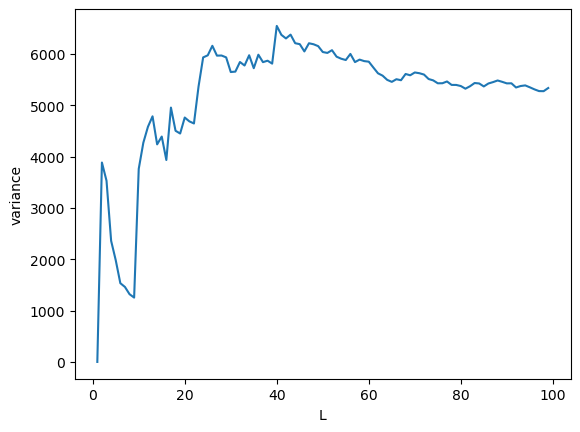

In [11]:
WealthSegregation(model, wealth_on_grid)